## Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/diabetes.csv

In [37]:
import pandas as pd
df = pd.read_csv('./diabetes.csv')

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

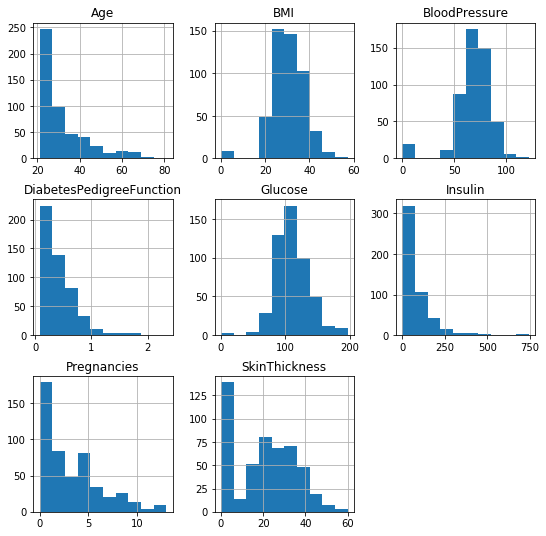

In [40]:
df[df['Outcome']==0].groupby('Outcome').hist(figsize=(9, 9))

Outcome
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

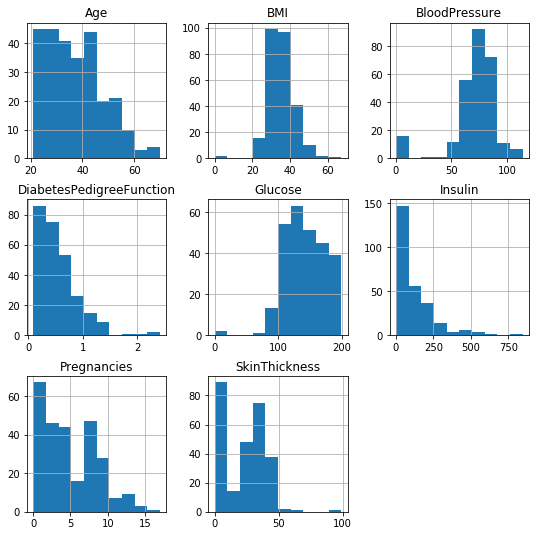

In [41]:
df[df['Outcome']==1].groupby('Outcome').hist(figsize=(9, 9))

In [42]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df_clean = df[(df.Glucose != 0)]
df_clean.shape 

(763, 9)

In [45]:
df_clean = df_clean[(df.BloodPressure != 0)]
df_clean.shape 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(728, 9)

In [46]:
df_clean = df_clean[(df.BMI != 0)]
df_clean.shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(724, 9)

In [47]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

In [48]:
def classification_metrics(Y_pred, Y_true):
    #NOTE: It is important to provide the output in the same order
    return (accuracy_score(Y_true,Y_pred),
            roc_auc_score(Y_true,Y_pred),
            precision_score(Y_true,Y_pred),
            recall_score(Y_true,Y_pred),
            f1_score(Y_true,Y_pred))

In [49]:
def plot_PR(Y_pred,Y_test):
    average_precision = average_precision_score(Y_test, Y_pred)
    precision, recall, _ = precision_recall_curve(Y_test, Y_pred)
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [50]:
def display_metrics(classifireName, Y_pred, Y_true):
    print("______________________________________________")
    print("Classifier: "+classifireName)
    acc, auc_, precision, recall, f1score = classification_metrics(Y_pred,Y_true)
    print("Accuracy: "+str(acc))
    print("ROC AUC: "+str(auc_))
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print("F1-score: "+str(f1score))
    print("______________________________________________")
    print("")

In [51]:
def plot_ROC(Y_pred, Y_test):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # for i in range(n_classes):
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 3 #Line Width
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of user become a buyer')
    plt.legend(loc="lower right")
    plt.show()

In [52]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

class_names = ['Positive', 'Negative']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
RANDOM_STATE = 903434960

In [54]:
X = df_clean.drop(['Outcome'], axis=1)
Y = df_clean['Outcome'].values

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_STATE)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

In [130]:
models = []
models.append(('DT', DecisionTreeClassifier(max_leaf_nodes=8)))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(50,))))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', LinearSVC(max_iter=100)))
models.append(('SVC_RBF', SVC(gamma='auto',kernel='rbf')))
models.append(('KNN_4', KNeighborsClassifier(n_neighbors=3)))
models.append(('KNN_8', KNeighborsClassifier(n_neighbors=5)))
models.append(('KNN_9', KNeighborsClassifier(n_neighbors=7)))

In [131]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

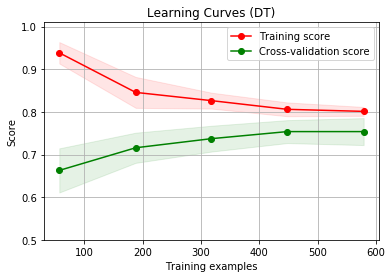

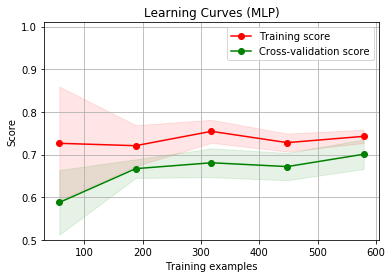

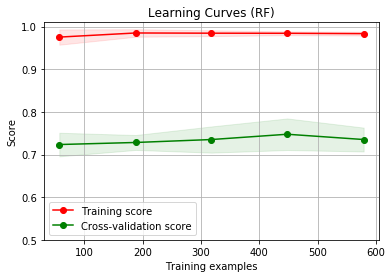

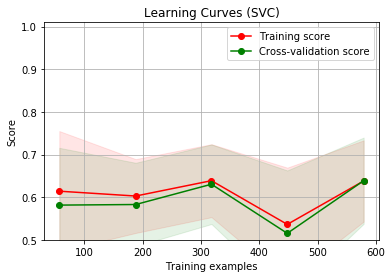

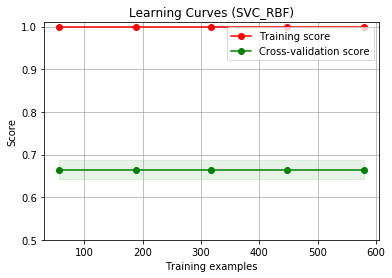

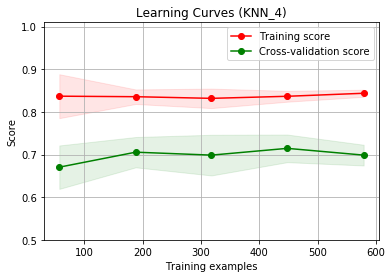

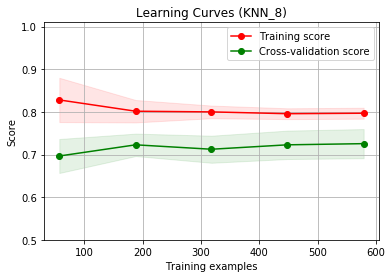

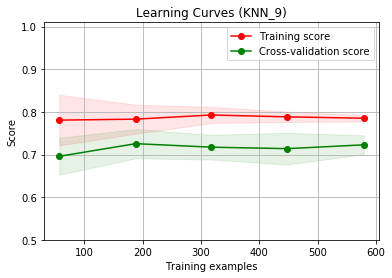

In [132]:
for name, model in models:

    title = "Learning Curves "+ "(" + name + ")"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    estimator = model
    plot_learning_curve(estimator, title, X, Y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

______________________________________________
Classifier: DT
Accuracy: 0.863013698630137
ROC AUC: 0.85515873015873
Precision: 0.8214285714285714
Recall: 0.8214285714285714
F1-score: 0.8214285714285714
______________________________________________



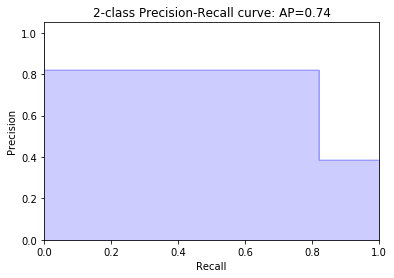

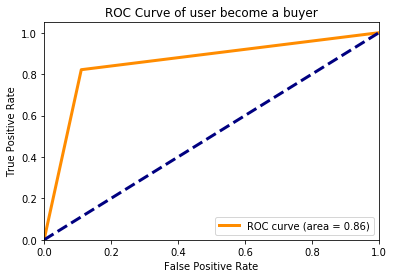

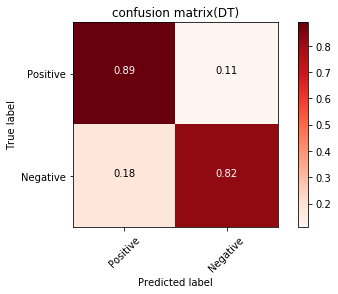

______________________________________________
Classifier: MLP
Accuracy: 0.7123287671232876
ROC AUC: 0.7261904761904762
Precision: 0.5945945945945946
Recall: 0.7857142857142857
F1-score: 0.676923076923077
______________________________________________



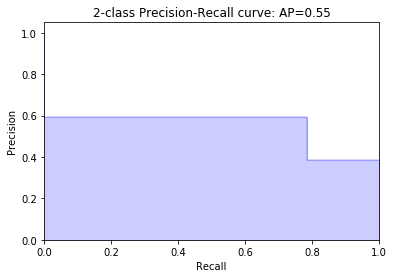

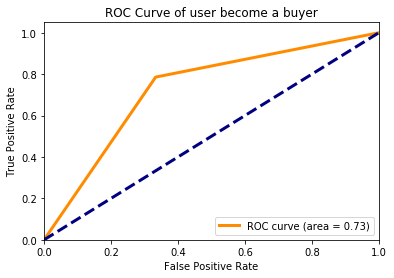

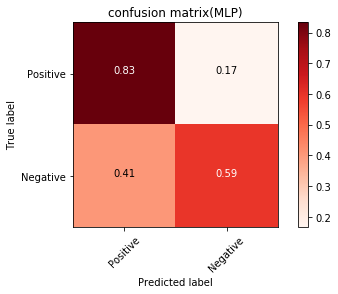

______________________________________________
Classifier: RF
Accuracy: 0.8082191780821918
ROC AUC: 0.7837301587301587
Precision: 0.7916666666666666
Recall: 0.6785714285714286
F1-score: 0.7307692307692307
______________________________________________



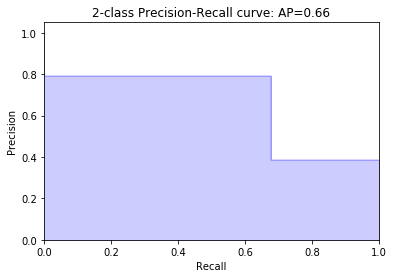

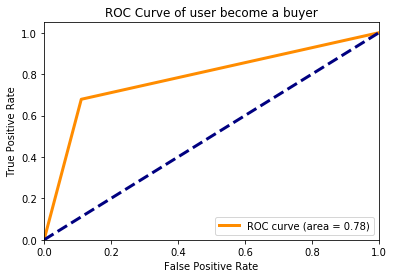

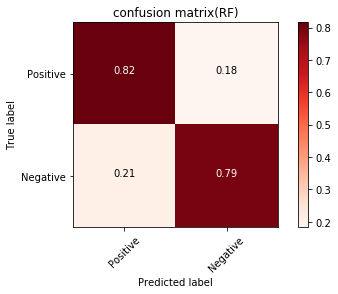

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


______________________________________________
Classifier: SVC
Accuracy: 0.6164383561643836
ROC AUC: 0.5
Precision: 0.0
Recall: 0.0
F1-score: 0.0
______________________________________________



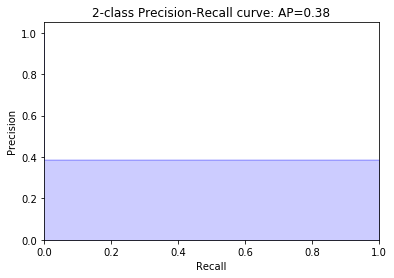

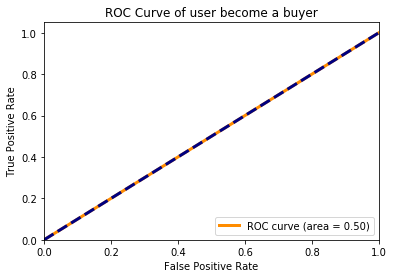

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


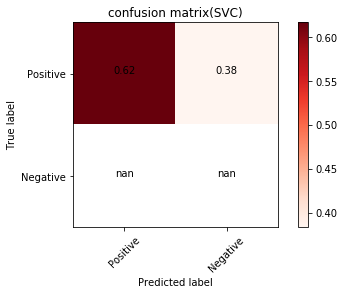

______________________________________________
Classifier: SVC_RBF
Accuracy: 0.6164383561643836
ROC AUC: 0.5
Precision: 0.0
Recall: 0.0
F1-score: 0.0
______________________________________________



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


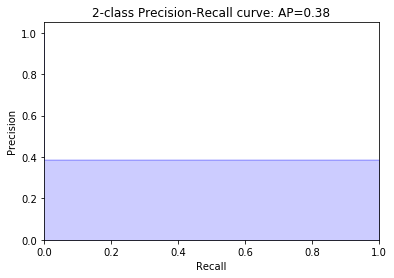

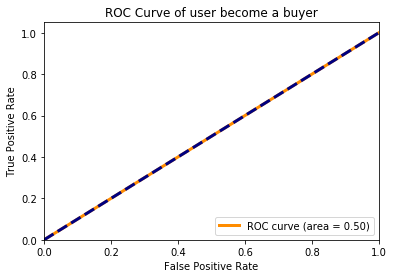

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


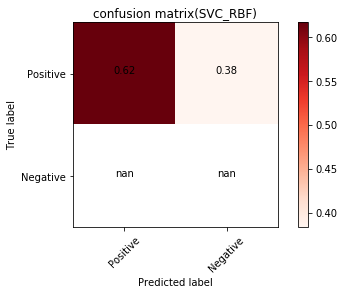

______________________________________________
Classifier: KNN_4
Accuracy: 0.7123287671232876
ROC AUC: 0.6992063492063492
Precision: 0.6206896551724138
Recall: 0.6428571428571429
F1-score: 0.6315789473684211
______________________________________________



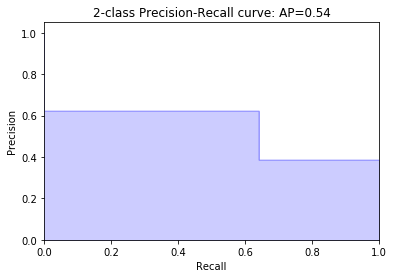

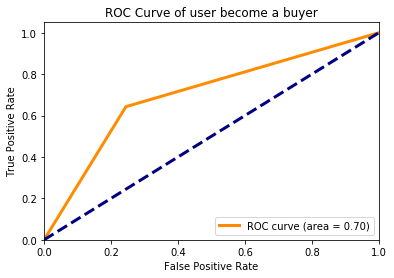

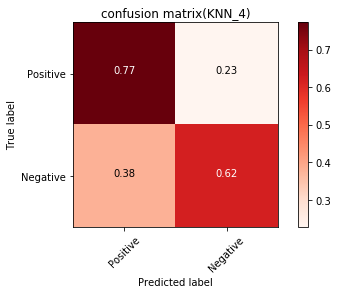

______________________________________________
Classifier: KNN_8
Accuracy: 0.7123287671232876
ROC AUC: 0.6857142857142857
Precision: 0.64
Recall: 0.5714285714285714
F1-score: 0.6037735849056605
______________________________________________



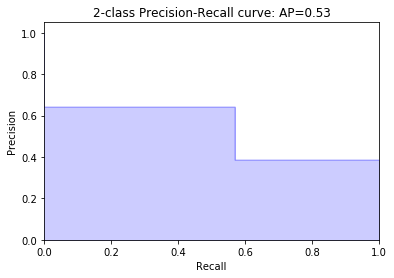

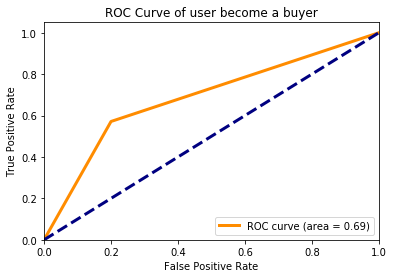

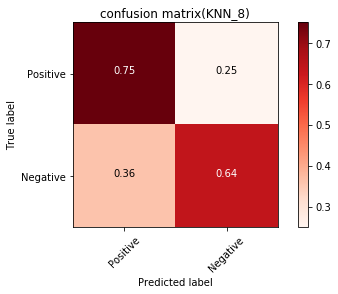

______________________________________________
Classifier: KNN_9
Accuracy: 0.7397260273972602
ROC AUC: 0.7146825396825397
Precision: 0.68
Recall: 0.6071428571428571
F1-score: 0.6415094339622641
______________________________________________



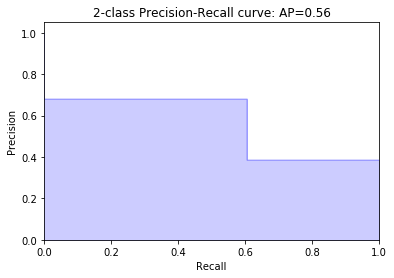

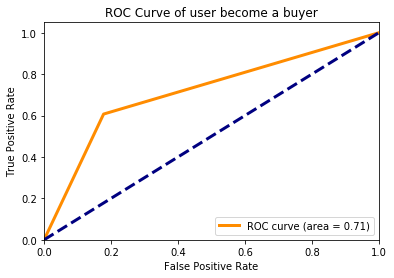

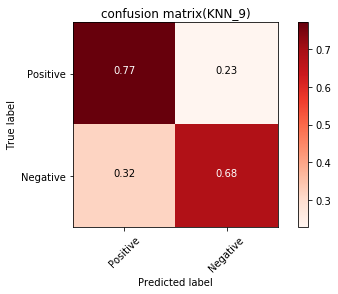

In [135]:
for name, model in models:
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    display_metrics(name,Y_predict,Y_test)
    plot_PR(Y_predict,Y_test)
    plot_ROC(Y_predict,Y_test)
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(Y_predict,Y_test)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='confusion matrix('+name+')')
    plt.show()

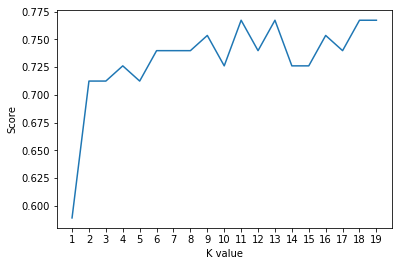

In [136]:
knn_scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train,Y_train)
    knn_scoreList.append(knn2.score(X_test, Y_test))
    
plt.plot(range(1,20), knn_scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

______________________________________________
Classifier: DT
Accuracy: 0.7928176795580111
ROC AUC: 0.7608962164447263
Precision: 0.7161572052401747
Recall: 0.6586345381526104
F1-score: 0.6861924686192468
______________________________________________



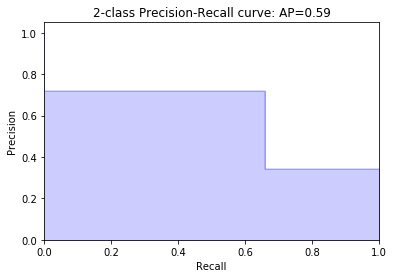

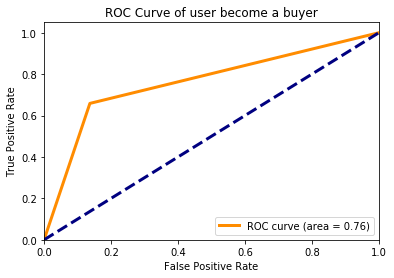

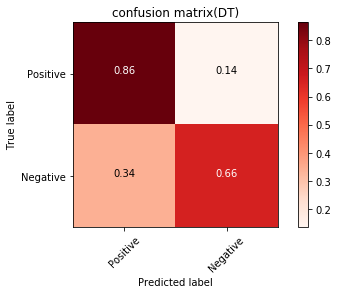

______________________________________________
Classifier: MLP
Accuracy: 0.6878453038674033
ROC AUC: 0.6837624180934263
Precision: 0.5369774919614148
Recall: 0.6706827309236948
F1-score: 0.5964285714285713
______________________________________________



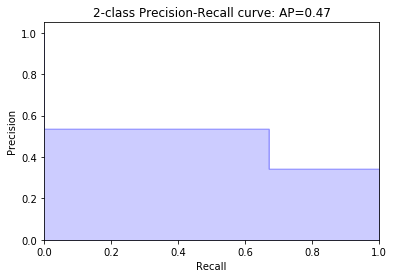

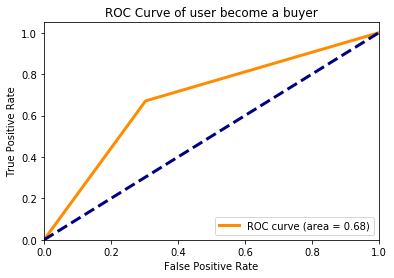

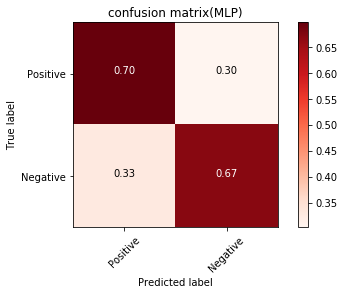

______________________________________________
Classifier: RF
Accuracy: 0.9585635359116023
ROC AUC: 0.9464468399915451
Precision: 0.9699570815450643
Recall: 0.9076305220883534
F1-score: 0.9377593360995851
______________________________________________



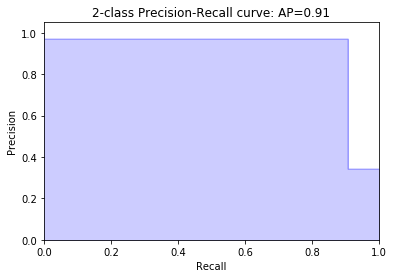

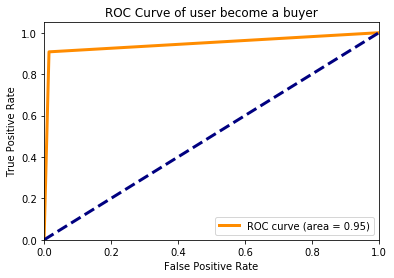

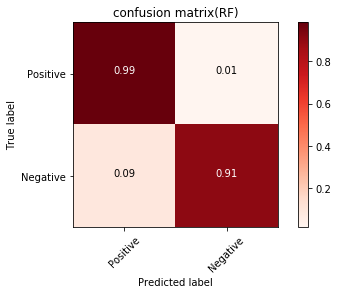

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.

______________________________________________
Classifier: SVC
Accuracy: 0.6560773480662984
ROC AUC: 0.5
Precision: 0.0
Recall: 0.0
F1-score: 0.0
______________________________________________



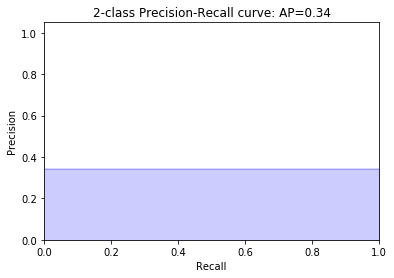

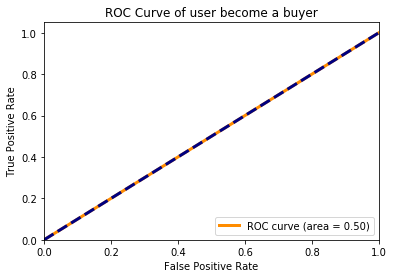

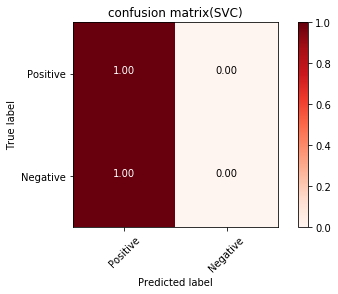

______________________________________________
Classifier: SVC_RBF
Accuracy: 0.9613259668508287
ROC AUC: 0.9437751004016064
Precision: 1.0
Recall: 0.8875502008032129
F1-score: 0.9404255319148938
______________________________________________



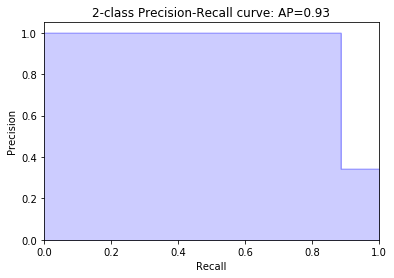

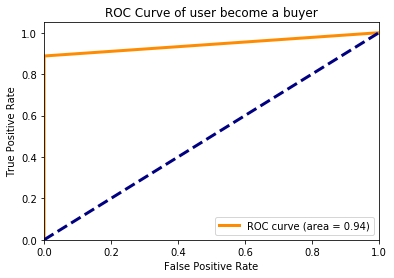

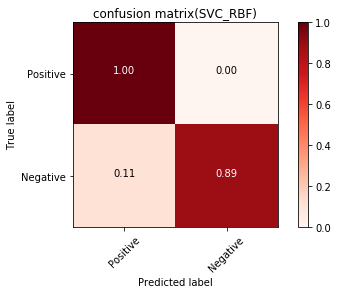

______________________________________________
Classifier: KNN_4
Accuracy: 0.8494475138121547
ROC AUC: 0.8222067216233354
Precision: 0.8097345132743363
Recall: 0.7349397590361446
F1-score: 0.7705263157894737
______________________________________________



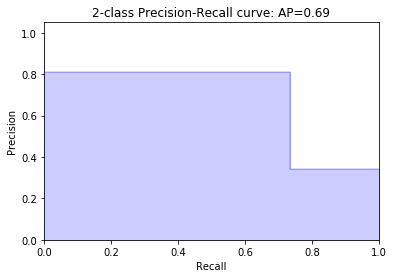

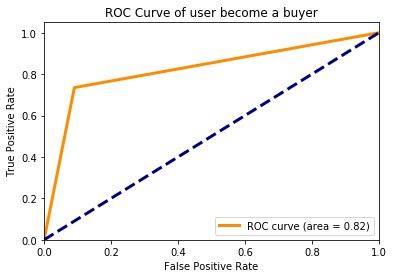

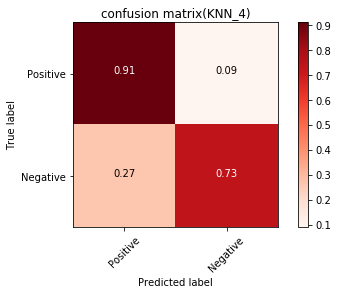

______________________________________________
Classifier: KNN_8
Accuracy: 0.7914364640883977
ROC AUC: 0.7541111815683788
Precision: 0.7247706422018348
Recall: 0.6345381526104418
F1-score: 0.6766595289079229
______________________________________________



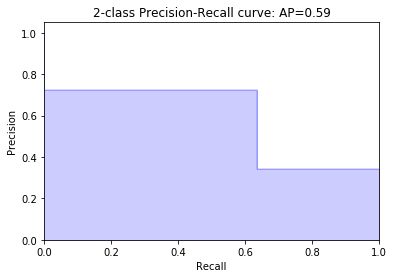

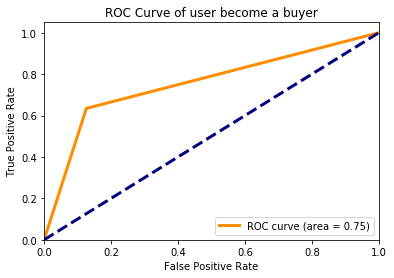

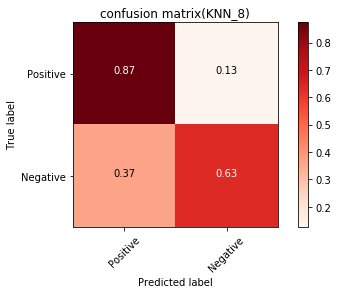

______________________________________________
Classifier: KNN_9
Accuracy: 0.7790055248618785
ROC AUC: 0.7408158951595858
Precision: 0.7031963470319634
Recall: 0.6184738955823293
F1-score: 0.6581196581196581
______________________________________________



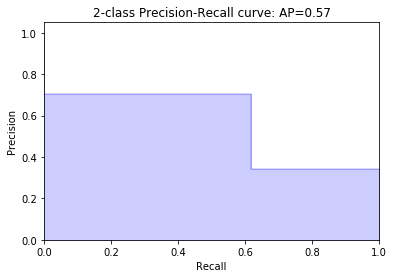

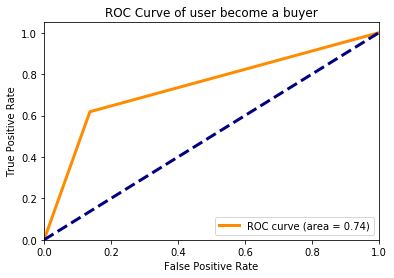

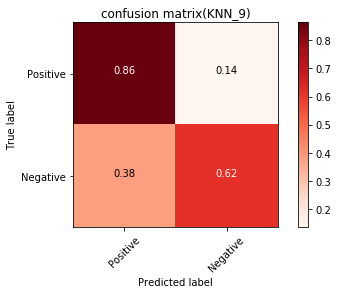

In [138]:
for name, model in models:

    k_fold = KFold(n_splits=3, random_state=RANDOM_STATE) 
    score = cross_val_score(model, X, Y, cv=k_fold, scoring='accuracy').mean()
    Y_pred = model.predict(X)

    display_metrics(name,Y_pred, Y)
    plot_PR(Y_pred,Y)
    plot_ROC(Y_pred, Y)
    
    cnf_matrix = confusion_matrix(Y, Y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='confusion matrix('+name+')')
    plt.show()